In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import layers, models

Loading the Dataset from Kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! pip install kaggle # install kaggle
! mkdir ~/.kaggle # make the kaggle directory
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/ # copy the json file to directory
! chmod 600 ~/.kaggle/kaggle.json # allocate the required permission

In [4]:
# to see if all is fine
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-11-21 16:54:23          16237  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           9809  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           4500  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3584  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [5]:
! kaggle datasets download -d gpiosenka/100-bird-species

 99% 1.13G/1.14G [00:07<00:00, 200MB/s]
100% 1.14G/1.14G [00:07<00:00, 172MB/s]


In [6]:
# since it's zipped

! unzip /content/100-bird-species.zip -d /content/birds

Streaming output truncated to the last 5000 lines.
  inflating: /content/birds/train/TURKEY VULTURE/144.jpg  
  inflating: /content/birds/train/TURKEY VULTURE/145.jpg  
  inflating: /content/birds/train/TURKEY VULTURE/146.jpg  
  inflating: /content/birds/train/TURKEY VULTURE/147.jpg  
  inflating: /content/birds/train/TURKEY VULTURE/148.jpg  
  inflating: /content/birds/train/TURKEY VULTURE/149.jpg  
  inflating: /content/birds/train/TURKEY VULTURE/150.jpg  
  inflating: /content/birds/train/TURKEY VULTURE/151.jpg  
  inflating: /content/birds/train/TURQUOISE MOTMOT/001.jpg  
  inflating: /content/birds/train/TURQUOISE MOTMOT/002.jpg  
  inflating: /content/birds/train/TURQUOISE MOTMOT/003.jpg  
  inflating: /content/birds/train/TURQUOISE MOTMOT/004.jpg  
  inflating: /content/birds/train/TURQUOISE MOTMOT/005.jpg  
  inflating: /content/birds/train/TURQUOISE MOTMOT/006.jpg  
  inflating: /content/birds/train/TURQUOISE MOTMOT/007.jpg  
  inflating: /content/birds/train/TURQUOISE MOTMOT

In [ ]:
# load the dataset

from tensorflow.keras.preprocessing.image import img_to_array, load_img
birds_dataset = r'/content/birds'

train_path = os.path.join(birds_dataset, 'train')
test_path = os.path.join(birds_dataset, 'test')
validation_path = os.path.join(birds_dataset, 'valid')
trial_path = os.path.join(birds_dataset, 'images to test')


img_height = 128
img_width = 128

# for train

train_images_a = []
train_images_b = []
train_labels_a = []
train_labels_b = []
categories = []
train_images_to_visualize_a = []
train_images_to_visualize_b = []

for index, category_name in enumerate(sorted(os.listdir(train_path))):
    image_file_loc = os.path.join(train_path, category_name)
    categories.append(category_name)
    
    for i, file in enumerate(sorted(os.listdir(image_file_loc))):
      
      # put images in different batches

      # for the first 50 images
      for i in range(0, 50):
        file_name = os.path.join(image_file_loc, file)
        train_images_to_visualize_a.append(file_name) # using this as a sanity check everything works fine
        img = load_img(file_name, target_size=(img_height, img_width))
        image = img_to_array(img)
        train_labels_a.append(index)
        train_images_a.append(image)

      # for the next 50 images
      for i in range(50, 100):
        file_name = os.path.join(image_file_loc, file)
        train_images_to_visualize_b.append(file_name) 
        img = load_img(file_name, target_size=(img_height, img_width))
        image = img_to_array(img)
        train_labels_b.append(index)
        train_images_b.append(image)

print('The number of train labels in batch a: ', len(train_labels_a))
print('The number of train images in batch a: ',len(train_images_a))

print('The number of train labels in batch b: ', len(train_labels_b))
print('The number of train images in batch b: ',len(train_images_b))

# for test

test_images = []
test_labels = []

for index, category_name in enumerate(sorted(os.listdir(test_path))):
    image_file_loc = os.path.join(test_path, category_name)
    

    for file in sorted(os.listdir(image_file_loc)):
        file_name = os.path.join(image_file_loc, file)
        img = load_img(file_name, target_size=(img_height, img_width))
        image = img_to_array(img)
        test_labels.append(index)
        test_images.append(image)

print('The number of test labels: ',len(test_labels))
print('The number of test images: ',len(test_images))

# for validation

val_images_a = []
val_labels_a = []

val_images_b = []
val_labels_b = []

for index, category_name in enumerate(sorted(os.listdir(validation_path))):
    image_file_loc = os.path.join(validation_path, category_name)
    
    for file in sorted(os.listdir(image_file_loc)):
       # put images in different batches

      # for the first 50 images
      for i in range(0, 50):
        file_name = os.path.join(image_file_loc, file)
        img = load_img(file_name, target_size=(img_height, img_width))
        image = img_to_array(img)
        val_labels_a.append(index)
        val_images_a.append(image)

      # for the next 50 images
      for i in range(50, 100):
        file_name = os.path.join(image_file_loc, file)
        img = load_img(file_name, target_size=(img_height, img_width))
        image = img_to_array(img)
        val_labels_b.append(index)
        val_images_b.append(image)
  

print('The number of validation labels in batch a: ', len(val_labels_a))
print('The number of validation images in batch a: ',len(val_images_a))

print('The number of validation labels in batch b: ', len(val_labels_b))
print('The number of validation images in batch b: ',len(val_images_b))

# for trial test

trial_image = []

for file in sorted(os.listdir(trial_path)):
    file_name = os.path.join(trial_path, file)
    img = load_img(file_name, target_size=(img_height, img_width))
    image = img_to_array(img)
    trial_image.append(image)
    
print('The number of images for quick test: ',len(trial_image))

In [8]:
train_labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,


In [9]:
len(train_labels)

15750

In [10]:
len(categories)

315

In [11]:
categories

['AFRICAN CROWNED CRANE',
 'AFRICAN FIREFINCH',
 'ALBATROSS',
 'ALEXANDRINE PARAKEET',
 'AMERICAN AVOCET',
 'AMERICAN BITTERN',
 'AMERICAN COOT',
 'AMERICAN GOLDFINCH',
 'AMERICAN KESTREL',
 'AMERICAN PIPIT',
 'AMERICAN REDSTART',
 'ANHINGA',
 'ANNAS HUMMINGBIRD',
 'ANTBIRD',
 'ARARIPE MANAKIN',
 'ASIAN CRESTED IBIS',
 'BALD EAGLE',
 'BALD IBIS',
 'BALI STARLING',
 'BALTIMORE ORIOLE',
 'BANANAQUIT',
 'BANDED BROADBILL',
 'BANDED PITA',
 'BAR-TAILED GODWIT',
 'BARN OWL',
 'BARN SWALLOW',
 'BARRED PUFFBIRD',
 'BAY-BREASTED WARBLER',
 'BEARDED BARBET',
 'BEARDED BELLBIRD',
 'BEARDED REEDLING',
 'BELTED KINGFISHER',
 'BIRD OF PARADISE',
 'BLACK & YELLOW bROADBILL',
 'BLACK BAZA',
 'BLACK FRANCOLIN',
 'BLACK SKIMMER',
 'BLACK SWAN',
 'BLACK TAIL CRAKE',
 'BLACK THROATED BUSHTIT',
 'BLACK THROATED WARBLER',
 'BLACK VULTURE',
 'BLACK-CAPPED CHICKADEE',
 'BLACK-NECKED GREBE',
 'BLACK-THROATED SPARROW',
 'BLACKBURNIAM WARBLER',
 'BLONDE CRESTED WOODPECKER',
 'BLUE COAU',
 'BLUE GROUSE',
 'BLUE 

In [12]:
train_labels[0]

0

In [13]:
train_images[0]

array([[[143., 153., 101.],
        [ 89.,  91.,  51.],
        [165., 149., 124.],
        ...,
        [133., 120., 111.],
        [125., 108., 100.],
        [151., 130., 127.]],

       [[156., 149., 105.],
        [154., 148., 116.],
        [129., 119.,  94.],
        ...,
        [154., 136., 122.],
        [150., 131., 114.],
        [123., 112.,  92.]],

       [[163., 155., 136.],
        [145., 138., 122.],
        [147., 147., 123.],
        ...,
        [133., 106.,  87.],
        [163., 143., 118.],
        [122., 125.,  96.]],

       ...,

       [[178., 202., 116.],
        [227., 244., 164.],
        [116., 139.,  31.],
        ...,
        [182., 179., 124.],
        [208., 217., 128.],
        [232., 240., 154.]],

       [[147., 200.,  66.],
        [190., 225., 121.],
        [172., 193.,  90.],
        ...,
        [218., 231., 152.],
        [214., 230., 132.],
        [211., 224., 152.]],

       [[156., 186.,  40.],
        [148., 170.,  62.],
        [183., 1

In [14]:
train_images_to_visualize[:50]

['/content/birds/train/AFRICAN CROWNED CRANE/001.jpg',
 '/content/birds/train/AFRICAN CROWNED CRANE/002.jpg',
 '/content/birds/train/AFRICAN CROWNED CRANE/003.jpg',
 '/content/birds/train/AFRICAN CROWNED CRANE/004.jpg',
 '/content/birds/train/AFRICAN CROWNED CRANE/005.jpg',
 '/content/birds/train/AFRICAN CROWNED CRANE/006.jpg',
 '/content/birds/train/AFRICAN CROWNED CRANE/007.jpg',
 '/content/birds/train/AFRICAN CROWNED CRANE/008.jpg',
 '/content/birds/train/AFRICAN CROWNED CRANE/009.jpg',
 '/content/birds/train/AFRICAN CROWNED CRANE/010.jpg',
 '/content/birds/train/AFRICAN CROWNED CRANE/011.jpg',
 '/content/birds/train/AFRICAN CROWNED CRANE/012.jpg',
 '/content/birds/train/AFRICAN CROWNED CRANE/013.jpg',
 '/content/birds/train/AFRICAN CROWNED CRANE/014.jpg',
 '/content/birds/train/AFRICAN CROWNED CRANE/015.jpg',
 '/content/birds/train/AFRICAN CROWNED CRANE/016.jpg',
 '/content/birds/train/AFRICAN CROWNED CRANE/017.jpg',
 '/content/birds/train/AFRICAN CROWNED CRANE/018.jpg',
 '/content

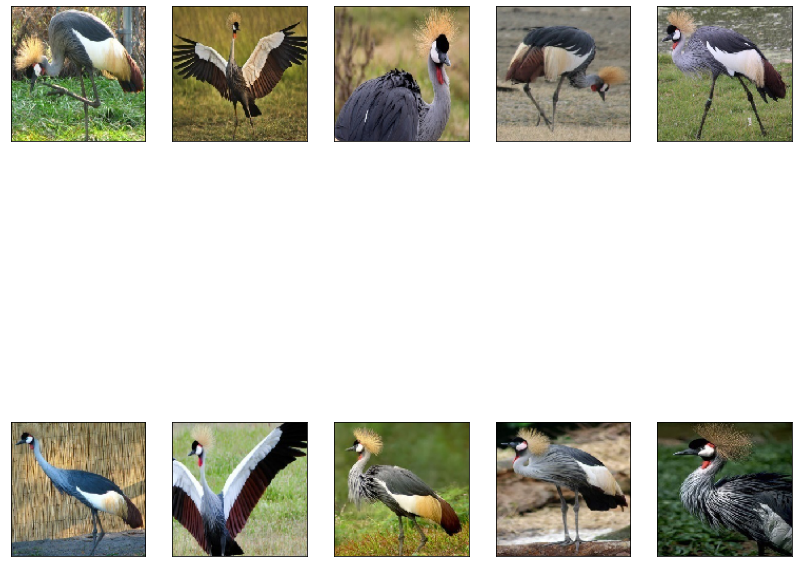

In [15]:
# let's see if all is properly done
from tensorflow.keras.preprocessing.image import load_img

# let's visualize for only the first ten images in the dataset
train_images_to_visualize = train_images_to_visualize[:10]

plt.figure(figsize=(14, 14))
index = 0

for i in range(len(train_images_to_visualize)):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    sign = train_images_to_visualize[i]
    img = load_img(sign, target_size=(img_height, img_width))
    plt.imshow(img)
    
plt.show()



In [16]:
# let's visualize the trial images

filenames= sorted(os.listdir(trial_path))
file_dir = []

for filename in filenames:
  file_path = os.path.join(trial_path, filename)
  file_dir.append(file_path)

print(file_dir)

['/content/birds/images to test/1.jpg', '/content/birds/images to test/14.jpg', '/content/birds/images to test/2.jpg', '/content/birds/images to test/3.jpg', '/content/birds/images to test/4.jpg', '/content/birds/images to test/5.jpg', '/content/birds/images to test/7.jpg']


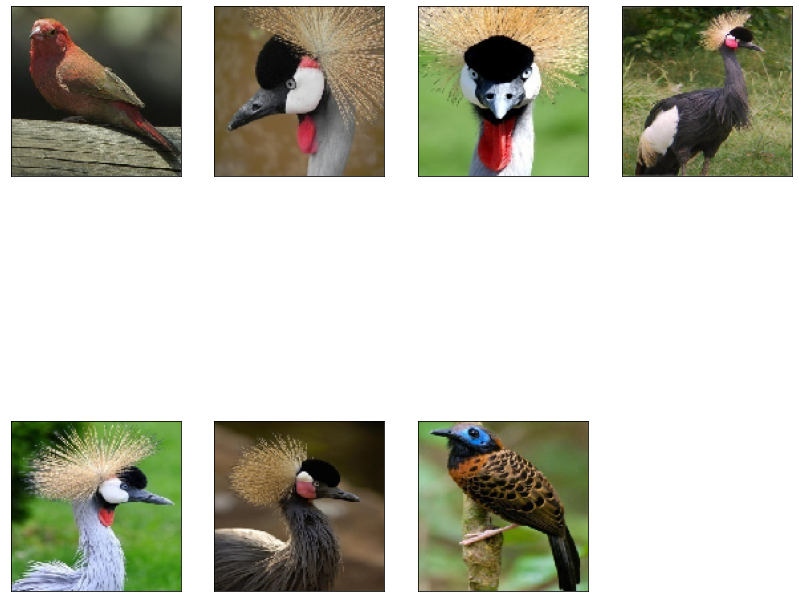

In [17]:
plt.figure(figsize=(14, 14))
index = 0

for i in range(len(filenames)):
    plt.subplot(2, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    sign = file_dir[i]
    img = load_img(sign, target_size=(img_height, img_width))
    plt.imshow(img)
    
plt.show()

In [18]:
# preprocessing

# convert the labels to numpy arrays

train_labels = np.array(train_labels)
test_labels = np.array(test_labels)
val_labels = np.array(val_labels)

In [19]:
train_labels

array([  0,   0,   0, ..., 314, 314, 314])

In [20]:
train_labels.shape

(15750,)

In [21]:
# convert the images to numpy arrays

train_images = np.array(train_images)
test_images = np.array(test_images)
val_images = np.array(val_images)
trial_images = np.array(trial_image)

In [22]:
train_images[0]

array([[[143., 153., 101.],
        [ 89.,  91.,  51.],
        [165., 149., 124.],
        ...,
        [133., 120., 111.],
        [125., 108., 100.],
        [151., 130., 127.]],

       [[156., 149., 105.],
        [154., 148., 116.],
        [129., 119.,  94.],
        ...,
        [154., 136., 122.],
        [150., 131., 114.],
        [123., 112.,  92.]],

       [[163., 155., 136.],
        [145., 138., 122.],
        [147., 147., 123.],
        ...,
        [133., 106.,  87.],
        [163., 143., 118.],
        [122., 125.,  96.]],

       ...,

       [[178., 202., 116.],
        [227., 244., 164.],
        [116., 139.,  31.],
        ...,
        [182., 179., 124.],
        [208., 217., 128.],
        [232., 240., 154.]],

       [[147., 200.,  66.],
        [190., 225., 121.],
        [172., 193.,  90.],
        ...,
        [218., 231., 152.],
        [214., 230., 132.],
        [211., 224., 152.]],

       [[156., 186.,  40.],
        [148., 170.,  62.],
        [183., 1

In [23]:
train_images.shape

(15750, 128, 128, 3)

In [24]:
# clip the arrays in the range 0 -1 

train_images = train_images[:]/255
test_images = test_images[:]/255
val_images = val_images[:]/255
trial_images = trial_images[:]/255

In [25]:
train_images[1]

array([[[0.47843137, 0.41960785, 0.15686275],
        [0.49411765, 0.42352942, 0.17254902],
        [0.49019608, 0.41960785, 0.1764706 ],
        ...,
        [0.4627451 , 0.4       , 0.16470589],
        [0.47058824, 0.39607844, 0.1764706 ],
        [0.47058824, 0.39215687, 0.19215687]],

       [[0.48235294, 0.42352942, 0.16078432],
        [0.4862745 , 0.42745098, 0.17254902],
        [0.5019608 , 0.43137255, 0.1882353 ],
        ...,
        [0.48235294, 0.41960785, 0.18431373],
        [0.4745098 , 0.4       , 0.18039216],
        [0.4627451 , 0.38431373, 0.18431373]],

       [[0.47843137, 0.41568628, 0.17254902],
        [0.4745098 , 0.4117647 , 0.16862746],
        [0.49411765, 0.43137255, 0.1882353 ],
        ...,
        [0.4862745 , 0.42352942, 0.19215687],
        [0.4627451 , 0.39607844, 0.18431373],
        [0.45882353, 0.38039216, 0.18039216]],

       ...,

       [[0.32156864, 0.30980393, 0.14117648],
        [0.40784314, 0.39607844, 0.21960784],
        [0.37254903, 0

In [26]:
train_images[1].shape

(128, 128, 3)

In [27]:
len(train_images)

15750

In [28]:
val_images.shape

(1575, 128, 128, 3)

In [29]:
train_images.shape[0]

15750

In [30]:
# let's shuffle the dataset

indices = np.arange(train_images.shape[0]) # 15750
np.random.shuffle(indices)
train_images = train_images[indices]
train_labels = train_labels[indices]

In [31]:
# let's shuffle the validation dataset
indices = np.arange(val_images.shape[0]) # 1575
np.random.shuffle(indices)
train_images = val_images[indices]
train_labels = val_labels[indices]

## ML Models

### Baseline model

In [32]:
model = models.Sequential(name='baseline_birds')
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=train_images[1].shape))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(len(categories), activation='softmax'))

In [33]:
model.summary()

Model: "baseline_birds"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)   

In [34]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("birds_baseline.h5", save_best_only=True)

In [35]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [36]:
history = model.fit(train_images, train_labels, epochs=20, validation_data=(val_images, val_labels), 
                    callbacks=[early_stopping_cb, checkpoint_cb])

Epoch 1/30
50/50 [==============================] - 53s 1s/step - loss: 5.7629 - acc: 0.0013 - val_loss: 5.7512 - val_acc: 0.0063
Epoch 2/30
50/50 [==============================] - 52s 1s/step - loss: 5.7433 - acc: 0.0063 - val_loss: 5.6383 - val_acc: 0.0146
Epoch 3/30
50/50 [==============================] - 52s 1s/step - loss: 5.5578 - acc: 0.0127 - val_loss: 5.2848 - val_acc: 0.0457
Epoch 4/30
50/50 [==============================] - 52s 1s/step - loss: 5.1227 - acc: 0.0375 - val_loss: 4.4796 - val_acc: 0.1486
Epoch 5/30
50/50 [==============================] - 52s 1s/step - loss: 4.3503 - acc: 0.1340 - val_loss: 3.5053 - val_acc: 0.3365
Epoch 6/30
50/50 [==============================] - 52s 1s/step - loss: 3.2226 - acc: 0.3054 - val_loss: 1.9886 - val_acc: 0.5575
Epoch 7/30
50/50 [==============================] - 52s 1s/step - loss: 2.0883 - acc: 0.4895 - val_loss: 1.0624 - val_acc: 0.7911
Epoch 8/30
50/50 [==============================] - 52s 1s/step - loss: 1.0964 - acc: 0.72

# Evaluating the performance

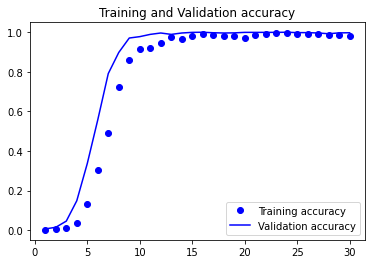

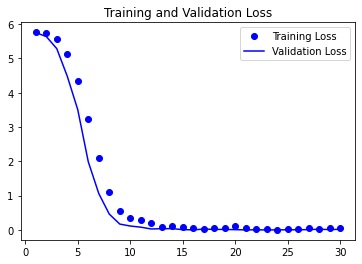

In [37]:
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b-', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

From the above, we were able to reach 99.75% accuracy on the validation set




## Evaluating on the test set

In [38]:
len(train_images)

1575

In [39]:
len(trial_images)

7

Let's see what the trial images tell us since that dataset was not labeled

In [40]:
trial_images[0]

array([[[0.46666667, 0.5019608 , 0.3882353 ],
        [0.4509804 , 0.4862745 , 0.37254903],
        [0.43137255, 0.46666667, 0.3529412 ],
        ...,
        [0.42745098, 0.43529412, 0.28235295],
        [0.43137255, 0.4392157 , 0.28627452],
        [0.44705883, 0.45490196, 0.3019608 ]],

       [[0.47058824, 0.49411765, 0.38431373],
        [0.44705883, 0.47058824, 0.36078432],
        [0.42352942, 0.44705883, 0.3372549 ],
        ...,
        [0.42745098, 0.42745098, 0.28627452],
        [0.43529412, 0.43529412, 0.28627452],
        [0.4509804 , 0.4509804 , 0.3019608 ]],

       [[0.4392157 , 0.45490196, 0.34901962],
        [0.42352942, 0.4392157 , 0.33333334],
        [0.40392157, 0.41960785, 0.3137255 ],
        ...,
        [0.43529412, 0.41960785, 0.28235295],
        [0.44705883, 0.43137255, 0.28627452],
        [0.4627451 , 0.45490196, 0.30588236]],

       ...,

       [[0.34509805, 0.34901962, 0.29411766],
        [0.3764706 , 0.38039216, 0.3254902 ],
        [0.3137255 , 0

In [41]:
trial_images_predict = model.predict(trial_images)

In [42]:
trial_images_predict = np.argmax(trial_images_predict, axis=1)

In [43]:
trial_images_predict

array([ 56,  28, 107,  48, 245, 182, 270])

Now, what do these classes represent?

In [44]:
len(categories)

315

In [45]:
class_dict = dict(enumerate(categories))
print(class_dict)

{0: 'AFRICAN CROWNED CRANE', 1: 'AFRICAN FIREFINCH', 2: 'ALBATROSS', 3: 'ALEXANDRINE PARAKEET', 4: 'AMERICAN AVOCET', 5: 'AMERICAN BITTERN', 6: 'AMERICAN COOT', 7: 'AMERICAN GOLDFINCH', 8: 'AMERICAN KESTREL', 9: 'AMERICAN PIPIT', 10: 'AMERICAN REDSTART', 11: 'ANHINGA', 12: 'ANNAS HUMMINGBIRD', 13: 'ANTBIRD', 14: 'ARARIPE MANAKIN', 15: 'ASIAN CRESTED IBIS', 16: 'BALD EAGLE', 17: 'BALD IBIS', 18: 'BALI STARLING', 19: 'BALTIMORE ORIOLE', 20: 'BANANAQUIT', 21: 'BANDED BROADBILL', 22: 'BANDED PITA', 23: 'BAR-TAILED GODWIT', 24: 'BARN OWL', 25: 'BARN SWALLOW', 26: 'BARRED PUFFBIRD', 27: 'BAY-BREASTED WARBLER', 28: 'BEARDED BARBET', 29: 'BEARDED BELLBIRD', 30: 'BEARDED REEDLING', 31: 'BELTED KINGFISHER', 32: 'BIRD OF PARADISE', 33: 'BLACK & YELLOW bROADBILL', 34: 'BLACK BAZA', 35: 'BLACK FRANCOLIN', 36: 'BLACK SKIMMER', 37: 'BLACK SWAN', 38: 'BLACK TAIL CRAKE', 39: 'BLACK THROATED BUSHTIT', 40: 'BLACK THROATED WARBLER', 41: 'BLACK VULTURE', 42: 'BLACK-CAPPED CHICKADEE', 43: 'BLACK-NECKED GREB

In [46]:
trial_images_predict

array([ 56,  28, 107,  48, 245, 182, 270])

In [47]:
# what type of bird does this predict

bird_type = []
#for key, values in class_dict.items():
  #keys.append(key)
  #values.append(values)
# print(keys)

for i in trial_images_predict:
  for key, value in class_dict.items():
    if i == key:
      bird_type.append(class_dict[key])


In [48]:
print(bird_type)

['BROWN NOODY', 'BEARDED BARBET', 'ELLIOTS  PHEASANT', 'BLUE GROUSE', 'RING-NECKED PHEASANT', 'MALEO', 'SPANGLED COTINGA']


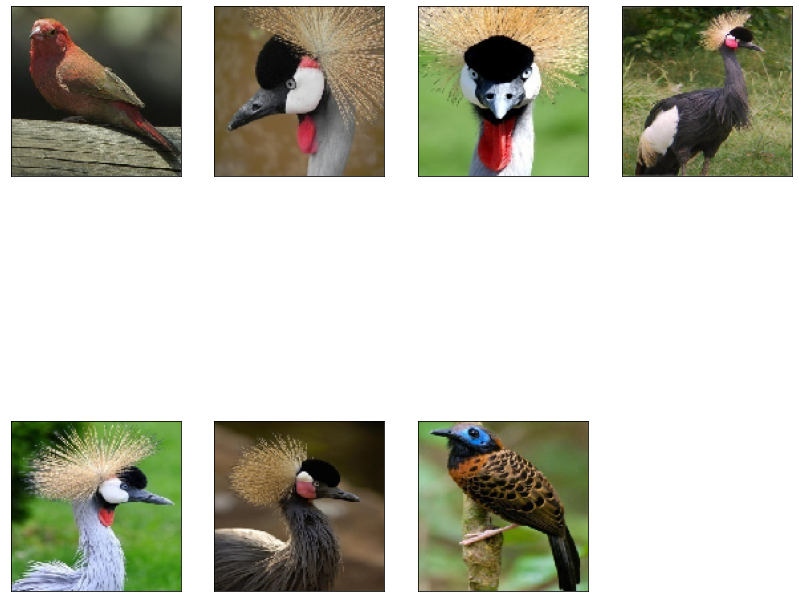

In [49]:
# let's see this trial images again

plt.figure(figsize=(14, 14))
index = 0

for i in range(len(filenames)):
    plt.subplot(2, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    sign = file_dir[i]
    img = load_img(sign, target_size=(img_height, img_width))
    plt.imshow(img)
    plt.title()
    
plt.show()

## Evaluate performance on test dataset

In [51]:
model.evaluate(test_images, test_labels)

50/50 [==============================] - 11s 213ms/step - loss: 11.3144 - acc: 0.1283


[11.314431190490723, 0.1282539665699005]